<a href="https://colab.research.google.com/github/EllieZhangy/Hotel-Booking-Cancellation-Prediction/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Demand Prediction
### MSCA 31008 IP03 Data Mining Principles Final Project
2023-Feb-20  
- Group 4: Xiran Li, Kelsey Liu, Kairan Zhong, Haiyue Wang, Yue Zhang, Jane Liu 
- Data Source: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/code?datasetId=511638&sortBy=voteCount

## Relevant Definition and Market Research

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, these datasets can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields.

Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon


> If you're a sunseeker the best time to visit Algarve is between June and August. The hottest month of the year is July with an average daily maximum of 30 C and an average low of 22 C. The coolest month of the year is February with an average daily maximum of 16 C and an average low of 10 C.

> March, April, May, September and October are great months to head to Lisbon for sightseeing and touring around. The weather is generally warm and pleasant, but not too hot and temperatures typically range from 68ºF - 80ºF - sometimes warm and sunny enough to even sneak in a beach day or two!

- **ADR (Average Daily Rate):**  
To find ADR, divide your total room revenue by the number of rooms sold. For example, if you sold 5 rooms out of your 10-room hotel and your total revenue was 2,000, then ADR would be 400.


- **deposit_type and cancelation correlation is counter-intuitive:**  
" ... These bookings are usually made through OTA using false or invalid credit card details. These bookings are issued as support for requests for visas to enter the country (a hotel booking is mandatory for applying for a Portuguese entry visa).  
After failing to charge the customer’s credit card, the hotel identifies these bookings as “fake” and contacts the customer; however, during the time required to verify these bookings, they contribute negatively to demand forecast and demand-management decisions."  
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/discussion/131787?datasetId=511638&sortBy=voteCount  
In case no payments were found the value is “No Deposit”. If the payment was equal or exceeded the total cost of stay, the value is set as “Non Refund”. Otherwise the value is set as “Refundable”.

- **Travel agents (TAs) vs Tour operators (TOs):**  
Travel agents (TAs) are companies or individuals who serve as intermediaries between travel suppliers and customers. They help customers book travel products such as flights, hotels, and tours. TAs earn a commission on the sales they make, which is typically paid by the travel supplier.  
Tour operators (TOs) are companies that specialize in designing and operating tour packages. They often work with travel agents to sell their tour products. Tour operators typically arrange transportation, accommodation, meals, and activities as part of their packages. They also earn a profit by marking up the prices of the products they include in the tour package.

https://www.duettocloud.com/library/cancellation-trends-cause-headaches-hotels

# 0.Import Libraries and Read Data

In [ ]:
#### Mount Google drive, we will be using GDrive for processing
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from glob import glob
from datetime import datetime
import warnings
warnings.simplefilter("ignore", UserWarning)

pd.set_option("display.max_columns", None)
plt.style.use("ggplot")

In [ ]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.model_selection import train_test_split

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Data-Mining-Final-Project/hotel_bookings.csv')

In [ ]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

# 1.Data Cleaning, preprocessing, and EDA

## 1.1 Data Cleaning

In [ ]:
data = df.copy()

In [ ]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Column with missing value: children, country, agent, company**

- children - missing value:

In [ ]:
# percent of missing "children" 
print('Percent of missing "children" records is %.5f%%' %((data['children'].isnull().sum()/data.shape[0])*100))

Percent of missing "children" records is 0.00335%


In [ ]:
data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
# There are only 0.0035% missing values for "children", so we use mode impution and impute with the most common value:
data["children"].fillna(data['children'].value_counts().idxmax(), inplace=True)

- country - missing value:

In [ ]:
# percent of missing "country" 
print('Percent of missing "country" records is %.2f%%' %((data['country'].isnull().sum()/data.shape[0])*100))

Percent of missing "country" records is 0.41%


In [ ]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
# Only 0.41% missing values for "country", so we use mode impution:
data["country"].fillna(data['country'].value_counts().idxmax(), inplace=True)

- agent - missing value:  
(agent: ID of the travel agency that made the booking)

In [ ]:
# percent of missing "agent" 
print('Percent of missing "agent" records is %.2f%%' %((data['agent'].isnull().sum()/data.shape[0])*100))

Percent of missing "agent" records is 13.69%


In [ ]:
data['agent'].dtype

dtype('float64')

In [ ]:
# Change the data type of Variable 'agent' to category and then replace the missing values with a new category "Unknown"
data['agent'] = data['agent'].fillna(-1)
data['agent'] = data['agent'].astype(int).astype('category')
data['agent'] = data['agent'].replace(-1, 'Unknown')

In [ ]:
data['agent'].value_counts()

9          31961
Unknown    16340
240        13922
1           7191
14          3640
           ...  
90             1
213            1
444            1
446            1
247            1
Name: agent, Length: 334, dtype: int64

- company - missing value:

In [ ]:
# percent of missing "company" 
print('Percent of missing "company" records is %.2f%%' %((data['company'].isnull().sum()/data.shape[0])*100))

Percent of missing "company" records is 94.31%


In [ ]:
# 94% of records are missing, so we'll just ignore this variable in our model:
data = data.drop(['company'],axis=1)

Check the missing value again:

In [ ]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type    agent  \
0                  C                3   No Deposit  Unknown   
1                  C                4   No Deposit  Unknown   
2                  C                0   No Deposit  Unknown   
3                  A                0   No Deposit      304   
4                  A                0   No Deposit      240   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [ ]:
data.shape

(119390, 31)

In [ ]:
data.arrival_date_year.unique()

array([2015, 2016, 2017])

## 1.2 EDA

In [ ]:
c_p = round(len(data.query("is_canceled == 1")) / len(data) * 100, 0)
print(f"The percentage of cancelled booking is:\n{c_p} %")

The percentage of cancelled booking is:
37.0 %


- Calculate the total cancellation, cancellation on City Hotel and Resort Hotel, and their respective percentage.

In [ ]:
# Calculate cancelation using .sum() (canceled = 1)
total_cancelations = data["is_canceled"].sum()
rh_cancelations = data.query("hotel == 'Resort Hotel'")["is_canceled"].sum()
ch_cancelations = data.query("hotel == 'City Hotel'")["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / data.shape[0] * 100
rh_rel_cancel = rh_cancelations / data.query("hotel == 'Resort Hotel'").shape[0] * 100
ch_rel_cancel = ch_cancelations / data.query("hotel == 'City Hotel'").shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,224 (37 %)
Resort hotel bookings canceled: 11,122 (28 %)
City hotel bookings canceled: 33,102 (42 %)


- Create two separate dataframe for the convenience of plotting later:  
`actual` for the valid (non-cancelled) bookings; `cancel` for the cancelled bookings. 

In [ ]:
# Create a subset called 'actual' for bookings that were not cancelled
actual = data.query('is_canceled == 0').rename(columns={"is_canceled": "total_booking"})
cancel = data.query('is_canceled == 1').rename(columns={"is_canceled": "total_booking"})

- Compare the valid bookings between City Hotel and Resort Hotel.

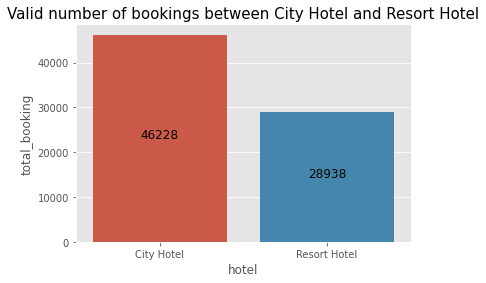

In [ ]:
temp = actual.groupby('hotel', as_index = False).count()[['hotel', 'total_booking']]

sns.barplot(data = temp, x='hotel', y= 'total_booking')
# Add labels to the plot
for index, value in enumerate(temp.total_booking):
    plt.text(index, value/2, str(value), ha='center', size=12)

# Show the plot
plt.title('Valid number of bookings between City Hotel and Resort Hotel', size =15)
plt.show()

- Dataset contains July and August date from 3 years, the other month from 2 years. 

In [ ]:
temp = actual.groupby(['arrival_date_year', 'arrival_date_month'], as_index = False).count()[['arrival_date_year', 'arrival_date_month']]
#temp.arrival_date_month.value_counts()
temp

arrival_date_year arrival_date_month
0                2015             August
1                2015           December
2                2015               July
3                2015           November
4                2015            October
5                2015          September
6                2016              April
7                2016             August
8                2016           December
9                2016           February
10               2016            January
11               2016               July
12               2016               June
13               2016              March
14               2016                May
15               2016           November
16               2016            October
17               2016          September
18               2017              April
19               2017             August
20               2017           February
21               2017            January
22               2017               July
23               2017               June
24               2017              March
25               2017                May

- Plot average non-cancelled bookings across each month:  
Distribution of Resort Hotel didn't vary too much, whereas distribution of city hotel fluctutated a lot.

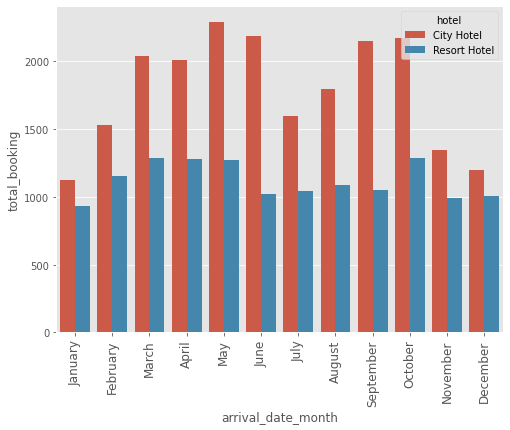

In [ ]:
plt.figure(figsize = (8,6))

temp = actual.groupby(['hotel', 'arrival_date_month'], as_index = False).count()[['hotel', 'arrival_date_month', 'total_booking']]

# Reorder arrival_date_month:
ordered_months = pd.DataFrame(["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"], columns = ['arrival_date_month'])

temp_a = ordered_months.join(temp.set_index('arrival_date_month'), on='arrival_date_month').reset_index(drop=True)

# Take the average across 2~3 years:

temp_a.loc[(temp_a["arrival_date_month"] == "July") | (temp_a["arrival_date_month"] == "August"),
                    "total_booking"]/=3
temp_a.loc[~((temp_a["arrival_date_month"] == "July") | (temp_a["arrival_date_month"] == "August")),
                    "total_booking"]/=2    
# Make Line plot:

sns.barplot(data= temp_a, x = 'arrival_date_month', y ='total_booking', hue = 'hotel')
plt.xticks(rotation = 90, size = 12)
plt.show()

- Plot average cancelled bookings across each month:  
Aligns roughly with the fluctuation in valid bookings. The peak of cancellation might just be the result of higher booking. We can further plot the percentage to see clearer.

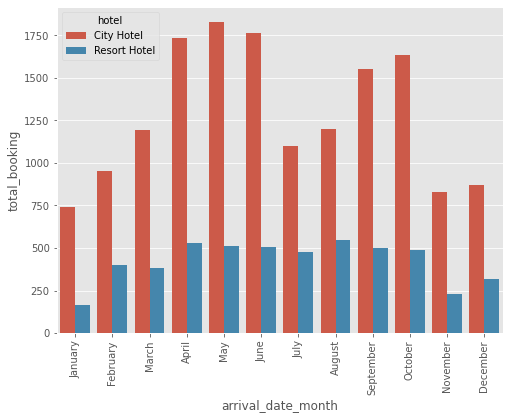

In [ ]:
plt.figure(figsize = (8,6))

temp = cancel.groupby(['hotel', 'arrival_date_month'], as_index = False).count()[['hotel', 'arrival_date_month', 'total_booking']]

# Reorder arrival_date_month:
ordered_months = pd.DataFrame(["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"], columns = ['arrival_date_month'])

temp_c = ordered_months.join(temp.set_index('arrival_date_month'), on='arrival_date_month').reset_index(drop = True)

# Take the average across 2~3 years:

temp_c.loc[(temp_c["arrival_date_month"] == "July") | (temp_c["arrival_date_month"] == "August"),
                    "total_booking"]/=3
temp_c.loc[~((temp_c["arrival_date_month"] == "July") | (temp_c["arrival_date_month"] == "August")),
                    "total_booking"]/=2    
# Make Line plot:

sns.barplot(data= temp_c, x = 'arrival_date_month', y ='total_booking', hue = 'hotel')
plt.xticks(rotation = 90)
plt.show()

- Plot cancelled bookings percentage across each month (average):  
There was quite similar pattern shown in both city and resort hotel plot, the factor in cancellation might be coming from external.

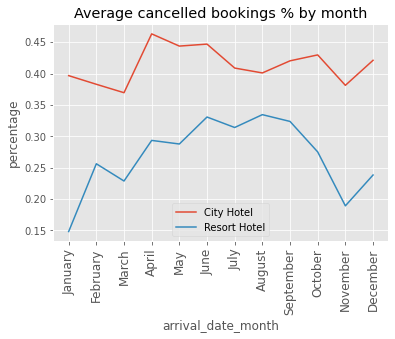

In [ ]:

plt.figure(figsize = (6,4))

temp_c['percentage'] = temp_c['total_booking']/ (temp_a['total_booking']+temp_c['total_booking'])

sns.lineplot(data= temp_c, x = 'arrival_date_month', y ='percentage', hue = 'hotel')
legend = plt.legend()
legend.get_title().set_fontsize(10)
plt.title('Average cancelled bookings % by month')
plt.xticks(rotation = 90, size=12)


plt.show()

- Plot by reserved room type and hotel type to see the distribution of average daily rate.

In [ ]:
px.box(actual, x = 'reserved_room_type', y = 'adr', color = 'hotel')

- Plot by average daily rate across different month to see the seanal effect.

In [ ]:
temp = cancel.groupby(['hotel', 'arrival_date_month'], as_index = False)['adr'].mean()
temp.head()


hotel arrival_date_month         adr
0  City Hotel              April  110.550823
1  City Hotel             August  109.105805
2  City Hotel           December   90.159149
3  City Hotel           February   83.323782
4  City Hotel            January   83.341309

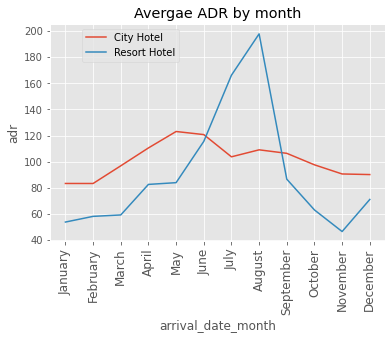

In [ ]:
plt.figure(figsize = (6,4))

temp = cancel.groupby(['hotel', 'arrival_date_month'], as_index = False)['adr'].mean()

# Reorder arrival_date_month:
ordered_months = pd.DataFrame(["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"], columns = ['arrival_date_month'])

temp_adr = ordered_months.join(temp.set_index('arrival_date_month'), on='arrival_date_month').reset_index(drop = True)

# Make Line plot:

sns.lineplot(data= temp_adr, x = 'arrival_date_month', y ='adr', hue = 'hotel')
legend = plt.legend()
legend.set_bbox_to_anchor((0.4, 1))
legend.get_title().set_fontsize(6)
plt.title('Avergae ADR by month')
plt.xticks(rotation = 90, size =12)
plt.show()

- Plot the distribution of home countries for all guests:  
People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

In [ ]:
temp = actual.country.value_counts().reset_index()
temp.columns = ['country', 'total_booking']
temp.head()

country  total_booking
0     PRT          21492
1     GBR           9676
2     FRA           8481
3     ESP           6391
4     DEU           6069

In [ ]:
plt.figure(figsize = (15, 10))
guest_map = px.choropleth(temp,
                    locations=temp.country,
                    color=temp["total_booking"], 
                    hover_name=temp.country, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

<Figure size 1080x720 with 0 Axes>

- **Plot certain features that we deem essential in predicting cancellation:**


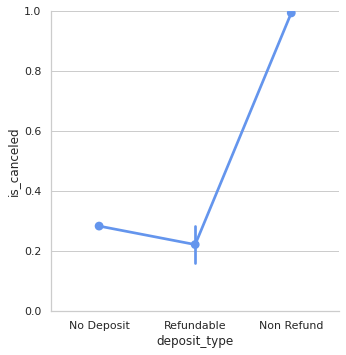

In [ ]:
sns.set(style="whitegrid")
g = sns.PairGrid(data, x_vars=["deposit_type"], y_vars="is_canceled", height=5)
g.map(sns.pointplot, color='cornflowerblue')
g.set(ylim=(0, 1))
plt.show()

In [ ]:
data.query("deposit_type == 'Non Refund'")['is_canceled'].value_counts()

1    14494
0       93
Name: is_canceled, dtype: int64

In [ ]:
pd.DataFrame(cancel.groupby(['hotel', 'deposit_type']).count()[['total_booking']]).style.background_gradient(cmap='Blues')

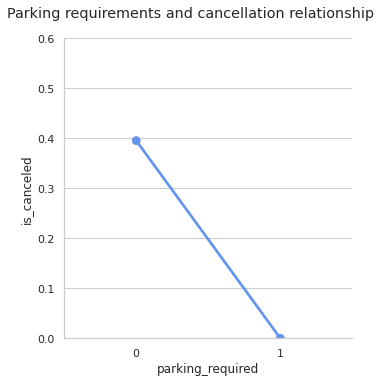

In [ ]:
temp = data[['required_car_parking_spaces', "is_canceled"]]
temp['parking_required'] = temp['required_car_parking_spaces'].apply(lambda x: 0 if x == 0 else 1)

sns.set(style="whitegrid")
g = sns.PairGrid(temp, x_vars=["parking_required"], y_vars="is_canceled", height=5)
g.map(sns.pointplot, color="cornflowerblue")
g.set(ylim=(0, 0.6))
g.fig.suptitle('Parking requirements and cancellation relationship', y= 1.05)
plt.show()

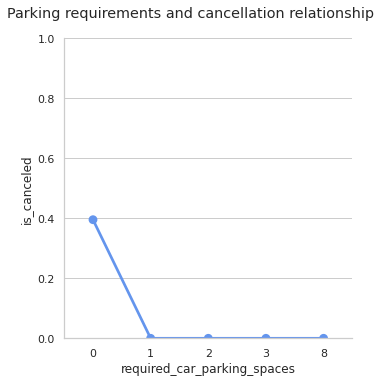

In [ ]:
sns.set(style="whitegrid")
g = sns.PairGrid(data, x_vars=["required_car_parking_spaces"], y_vars="is_canceled", height=5)
g.map(sns.pointplot, color="cornflowerblue")
g.set(ylim=(0, 1))
g.fig.suptitle('Parking requirements and cancellation relationship', y= 1.05)
plt.show()

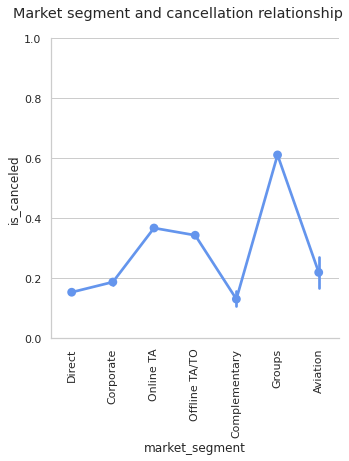

In [ ]:
temp = data.query("market_segment != 'Undefined'")
sns.set(style="whitegrid")
g = sns.PairGrid(temp, x_vars=['market_segment'], y_vars="is_canceled", height=5)
g.map(sns.pointplot, color='cornflowerblue')
g.set(ylim=(0, 1))
g.fig.suptitle('Market segment and cancellation relationship', y= 1.05)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

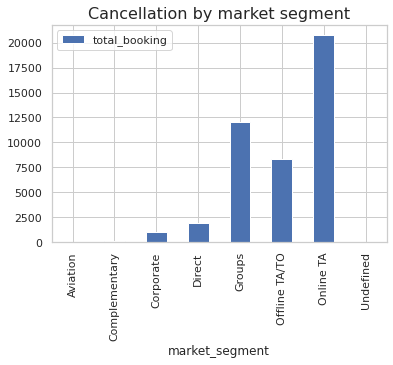

In [ ]:
cancel.groupby('market_segment').count()[['total_booking']].plot(kind = 'bar')
plt.title('Cancellation by market segment', size =16)
plt.show()

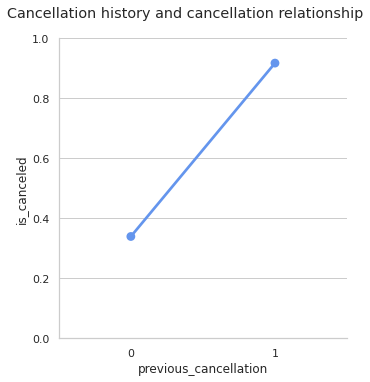

In [ ]:
temp = data[['previous_cancellations', "is_canceled"]]
temp['previous_cancellation'] = temp['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)

sns.set(style="whitegrid")
g = sns.PairGrid(temp, x_vars=["previous_cancellation"], y_vars="is_canceled", height=5)
g.map(sns.pointplot, color="cornflowerblue")
g.set(ylim=(0, 1))
g.fig.suptitle('Cancellation history and cancellation relationship', y= 1.05)
plt.show()

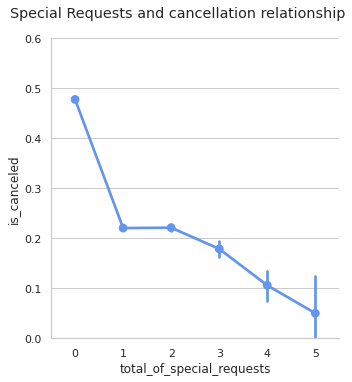

In [ ]:
sns.set(style="whitegrid")
g = sns.PairGrid(data, x_vars=["total_of_special_requests"], y_vars="is_canceled", height=5)
g.map(sns.pointplot, color="cornflowerblue")
g.set(ylim=(0, 0.6))
g.fig.suptitle('Special Requests and cancellation relationship', y= 1.05)
plt.show()

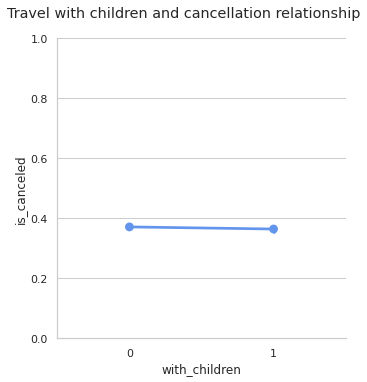

In [ ]:
temp = data[['children', "is_canceled"]]
temp['with_children'] = temp['children'].apply(lambda x: 0 if x == 0 else 1)

sns.set(style="whitegrid")
g = sns.PairGrid(temp, x_vars=["with_children"], y_vars="is_canceled", height=5)
g.map(sns.pointplot, color="cornflowerblue")
g.set(ylim=(0, 1))
g.fig.suptitle('Travel with children and cancellation relationship', y= 1.05)
plt.show()

## 1.3 Data Preprocessing

### 1.3.1 Select Features

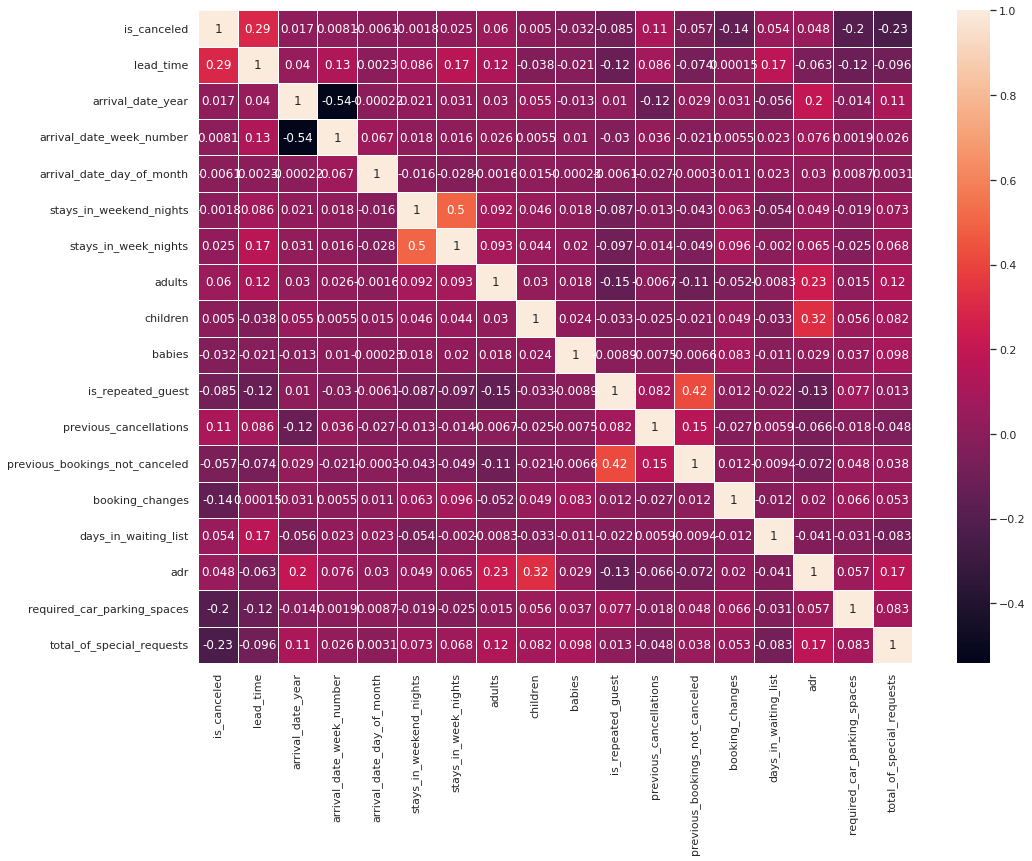

In [ ]:
# Check the heatmap:
plt.figure(figsize = (16, 12))

corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
correlation = data.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

- From this list above, it is apparent that 'lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'booking_changes and previous_cancellations' are the 5 most important numerical features. 

Here is how we decide to delete some useless features:

- The most important feature to exclude is the 'reservation_status' (it has almost the same meaning as our target so we delete it).

In [ ]:
data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

- Some features are highly correlated. For example, 'arrival_date_year' and 'arrival_date_week_number': we only keep 'arrival_date_week_number'; 'stays_in_week_nights' and 'stays_in_weekend_nights': we only keep 'stays_in_week_nights'.
- Some features will change over time , for example, 'booking changes' and 'reservation_status_date' (Date at which the last status was set). We also drop them.
- Some features are not so useful in this case: including agent ID, reservation_status_date...etc.

In [ ]:
useless_col = ['arrival_date_year', 'reservation_status', 'stays_in_weekend_nights',  # features with high correlation.
               'booking_changes', 'days_in_waiting_list','reservation_status_date', # information changing over time
               'assigned_room_type',  # not so useful for modeling since we focus more on reservasion_room_type
               'agent' #agent ID which is not useful for modeling
               ]

data1 = data.drop(useless_col, axis = 1)
data1.head()

hotel  is_canceled  lead_time arrival_date_month  \
0  Resort Hotel            0        342               July   
1  Resort Hotel            0        737               July   
2  Resort Hotel            0          7               July   
3  Resort Hotel            0         13               July   
4  Resort Hotel            0         14               July   

   arrival_date_week_number  arrival_date_day_of_month  stays_in_week_nights  \
0                        27                          1                     0   
1                        27                          1                     0   
2                        27                          1                     1   
3                        27                          1                     1   
4                        27                          1                     2   

   adults  children  babies meal country market_segment distribution_channel  \
0       2       0.0       0   BB     PRT         Direct               Direct   
1       2       0.0       0   BB     PRT         Direct               Direct   
2       1       0.0       0   BB     GBR         Direct               Direct   
3       1       0.0       0   BB     GBR      Corporate            Corporate   
4       2       0.0       0   BB     GBR      Online TA                TA/TO   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

  reserved_room_type deposit_type customer_type   adr  \
0                  C   No Deposit     Transient   0.0   
1                  C   No Deposit     Transient   0.0   
2                  A   No Deposit     Transient  75.0   
3                  A   No Deposit     Transient  75.0   
4                  A   No Deposit     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  
0                            0                          0  
1                            0                          0  
2                            0                          0  
3                            0                          0  
4                            0                          1

### 1.3.2 Create New Features

In [ ]:
# combine adults and children into a new feature 'family'
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [ ]:
def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [ ]:
# "total_customer" = "adults" + "children" + "babies":
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    return data

In [ ]:
data1 = feature(data1)
data1 = data1.drop(columns = ['adults', 'babies', 'children', 'deposit_type'])

data1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'customer_type',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'is_family', 'total_customer', 'deposit_given'],
      dtype='object')

### 1.3.3 Data Transformation

#### For categorical features:

In [ ]:
cat_cols = [col for col in data1.columns if data1[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'customer_type']

In [ ]:
cat_data = data1[cat_cols]
cat_data.head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type customer_type  
0               Direct                  C     Transient  
1               Direct                  C     Transient  
2               Direct                  A     Transient  
3            Corporate                  A     Transient  
4                TA/TO                  A     Transient

In [ ]:
# printing unique values of each column
for col in cat_data.columns:
    print(f"{col}: \n{cat_data[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'E

#### Encoding categorical variables:


In [ ]:
# label some features manually:
cat_data['hotel'] = cat_data['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_data['customer_type'] = cat_data['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_data['arrival_date_month'] = cat_data['arrival_date_month'].map({'July':7, 'August':8, 'September':9, 'October':10, 'November':11,
                                                                      'December':12, 'January':1, 'February':2, 'March':3, 'April':4, 
                                                                      'May':5, 'June':6})

In [ ]:
# Use ordinal encoding for others:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data['market_segment'] = le.fit_transform(cat_data['market_segment']) 
cat_data['meal'] = le.fit_transform(cat_data['meal'])
cat_data['reserved_room_type'] = le.fit_transform(cat_data['reserved_room_type']) 
cat_data['distribution_channel']  = le.fit_transform(cat_data['distribution_channel'])
cat_data['country'] = le.fit_transform(cat_data['country'])

In [ ]:
cat_data.head()

hotel  arrival_date_month  meal  country  market_segment  \
0      0                   7     0      135               3   
1      0                   7     0      135               3   
2      0                   7     0       59               3   
3      0                   7     0       59               2   
4      0                   7     0       59               6   

   distribution_channel  reserved_room_type  customer_type  
0                     1                   2              0  
1                     1                   2              0  
2                     1                   0              0  
3                     0                   0              0  
4                     3                   0              0

#### For numerical features:

In [ ]:
num_data = data1.drop(columns = cat_cols, axis = 1)
num_data.drop('is_canceled', axis = 1, inplace = True)
num_cols = num_data.columns.tolist()
print('num_cols:', num_cols)

num_data.head()

num_cols: ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_week_nights', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'is_family', 'total_customer', 'deposit_given']


lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0        342                        27                          1   
1        737                        27                          1   
2          7                        27                          1   
3         13                        27                          1   
4         14                        27                          1   

   stays_in_week_nights  is_repeated_guest  previous_cancellations  \
0                     0                  0                       0   
1                     0                  0                       0   
2                     1                  0                       0   
3                     1                  0                       0   
4                     2                  0                       0   

   previous_bookings_not_canceled   adr  required_car_parking_spaces  \
0                               0   0.0                            0   
1                               0   0.0                            0   
2                               0  75.0                            0   
3                               0  75.0                            0   
4                               0  98.0                            0   

   total_of_special_requests  is_family  total_customer  deposit_given  
0                          0          0             2.0              0  
1                          0          0             2.0              0  
2                          0          0             1.0              0  
3                          0          0             1.0              0  
4                          1          0             2.0              0

In [ ]:
num_data.var()

lead_time                         11419.721511
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_week_nights                  3.641554
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
is_family                             0.070476
total_customer                        0.521853
deposit_given                         0.107253
dtype: float64

In [ ]:
# Transform those feature with large variance:
num_data['lead_time'] = np.log(num_data['lead_time'] + 1)
num_data['arrival_date_week_number'] = np.log(num_data['arrival_date_week_number'] + 1)
num_data['arrival_date_day_of_month'] = np.log(num_data['arrival_date_day_of_month'] + 1)
# (num_data['adr']<= -1).sum()  # 1
num_data['adr'] = np.log(np.where(num_data['adr']<-1,0,num_data['adr']) +1)

In [ ]:
num_data.var()

lead_time                         2.591420
arrival_date_week_number          0.441039
arrival_date_day_of_month         0.506267
stays_in_week_nights              3.641554
is_repeated_guest                 0.030894
previous_cancellations            0.712904
previous_bookings_not_canceled    2.242317
adr                               0.540516
required_car_parking_spaces       0.060168
total_of_special_requests         0.628529
is_family                         0.070476
total_customer                    0.521853
deposit_given                     0.107253
dtype: float64

#### Final Data for Modeling:

In [ ]:
X = pd.concat([cat_data, num_data], axis = 1)
y = data['is_canceled']

all_data = pd.concat([y,X], axis=1)
all_data.head()

is_canceled  hotel  arrival_date_month  meal  country  market_segment  \
0            0      0                   7     0      135               3   
1            0      0                   7     0      135               3   
2            0      0                   7     0       59               3   
3            0      0                   7     0       59               2   
4            0      0                   7     0       59               6   

   distribution_channel  reserved_room_type  customer_type  lead_time  \
0                     1                   2              0   5.837730   
1                     1                   2              0   6.603944   
2                     1                   0              0   2.079442   
3                     0                   0              0   2.639057   
4                     3                   0              0   2.708050   

   arrival_date_week_number  arrival_date_day_of_month  stays_in_week_nights  \
0                  3.332205                   0.693147                     0   
1                  3.332205                   0.693147                     0   
2                  3.332205                   0.693147                     1   
3                  3.332205                   0.693147                     1   
4                  3.332205                   0.693147                     2   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

        adr  required_car_parking_spaces  total_of_special_requests  \
0  0.000000                            0                          0   
1  0.000000                            0                          0   
2  4.330733                            0                          0   
3  4.330733                            0                          0   
4  4.595120                            0                          1   

   is_family  total_customer  deposit_given  
0          0             2.0              0  
1          0             2.0              0  
2          0             1.0              0  
3          0             1.0              0  
4          0             2.0              0

In [ ]:
features = all_data.columns.tolist()[1:]  # drop the first column which is our target
features 

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'customer_type',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'deposit_given']

#2.Dimension Reduction: PCA + t-SNE

### 2.1 PCA

PCA is a technique for dimensionality reduction that works on numeric data, so it's typically not applied to categorical variables directly. However, in the feature engineering part, we convert those categorical variables into numeric representations using manual labels and one-hot encoding methods. Thus, now we can run PCA analysis on X.

In [ ]:
# Standardize the numerical features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

First, we visualize High Dimensional Dataset X in 2D and 3D with PCA.

In [ ]:
# 2D
# perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
explained_variance_ratios = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratios):
    print(f"The explained variance ratio of PC{i+1}: {ratio:.3f}")

The explained variance ratio of PC1: 0.138
The explained variance ratio of PC2: 0.106


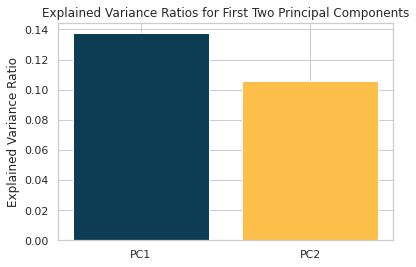

In [ ]:
fig, ax = plt.subplots()

component_labels = [f"PC{i+1}" for i in range(len(explained_variance_ratios))]
bar_heights = explained_variance_ratios[:2]

x_pos = np.arange(len(component_labels))
colors = ['#0D3C55', '#FCBF49']
ax.bar(x_pos, bar_heights, align='center', color=colors)
ax.set_xticks(x_pos)
ax.set_xticklabels(component_labels)
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratios for First Two Principal Components')

# Set the font styles
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

plt.show()

This means that the principal component 1 holds 13.8% of the information while the principal component 2 holds 10.6% of the information. Summing them up, we will have ~24.4% of information.

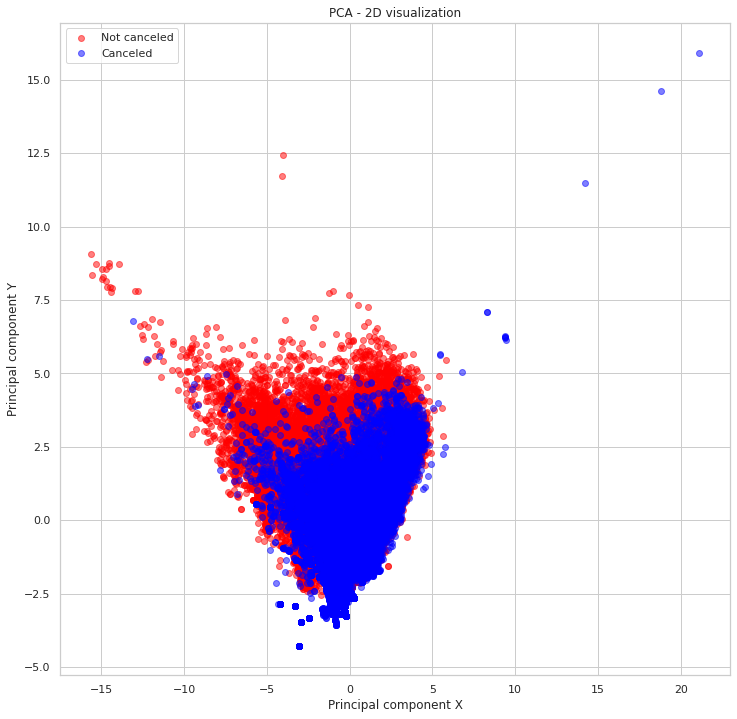

In [ ]:
# plot 2D visualization
plt.figure(figsize=(12,12))

plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5,label='Not canceled')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5,label='Canceled')

plt.title("PCA - 2D visualization")
plt.ylabel('Principal component Y')
plt.xlabel('Principal component X')
plt.legend()
plt.show()

The ideal pattern would be distinct clusters. But now the clusters are overlapping with each other a lot.



In [ ]:
# 3D
# perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
explained_variance_ratios = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratios):
    print(f"The explained variance ratio of PC{i+1}: {ratio:.3f}")

The explained variance ratio of PC1: 0.138
The explained variance ratio of PC2: 0.106
The explained variance ratio of PC3: 0.093


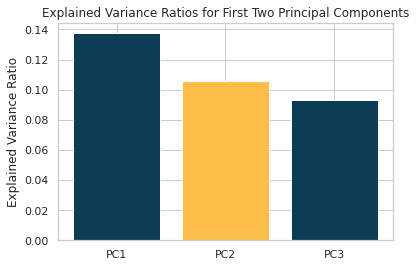

In [ ]:
fig, ax = plt.subplots()

component_labels = [f"PC{i+1}" for i in range(len(explained_variance_ratios))]
bar_heights = explained_variance_ratios[:3]

x_pos = np.arange(len(component_labels))
colors = ['#0D3C55', '#FCBF49']
ax.bar(x_pos, bar_heights, align='center', color=colors)
ax.set_xticks(x_pos)
ax.set_xticklabels(component_labels)
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratios for First Two Principal Components')

# Set the font styles
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

plt.show()

This means that the principal component 1 holds 13.8% of the information while the principal component 2 and 3 hold 10.6% and 9.3% of the information respectively. Summing them up, we will have ~33.7% of information.

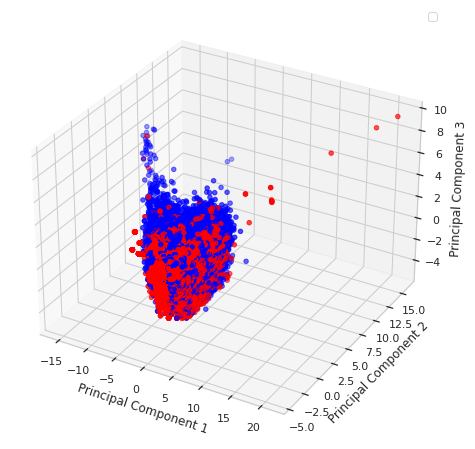

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Define color map
colors = np.array(['blue', 'red'])

# Plot points with colors
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=colors[y])

# Label the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a legend
ax.legend()
plt.show()


Still, the clusters are overlapping with each other a lot.

Then, we use scree plot to visualize the explained variance ratios for each principal component and determine the optimal number of components to retain in the data.

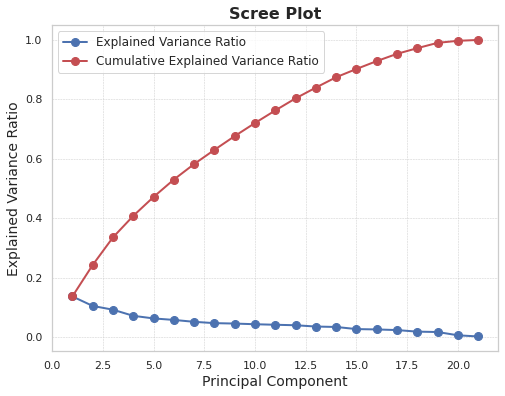

In [ ]:
n_components = X_scaled.shape[1] # number of components equals the number of features
pca = PCA(n_components=n_components) # create a PCA object with all components
pca.fit(X_scaled) # fit the PCA model to your scaled data

# calculate the explained variance ratios and cumulative explained variance ratios
explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)

# plot the scree plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, n_components+1), explained_variances, 'bo-', linewidth=2, markersize=8, label='Explained Variance Ratio')
ax.plot(range(1, n_components+1), cumulative_variances, 'ro-', linewidth=2, markersize=8, label='Cumulative Explained Variance Ratio')
ax.set_xlabel('Principal Component', fontsize=14)
ax.set_ylabel('Explained Variance Ratio', fontsize=14)
ax.set_title('Scree Plot', fontsize=16, fontweight='bold')
ax.legend(loc='best', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5)
plt.show()

The result shows that we need about 15 components to represent 90% information of the dataset.

Lastly, we save the 15 principal components obtained from PCA as a new dataset to do further clustering.

In [ ]:
# perform PCA with 15 components
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)

# save the 15 principal components to a new dataset
X_pca_15 = pd.DataFrame(X_pca, columns=['PC{}'.format(i+1) for i in range(15)])

### 2.2 T-SNE

#### 2.2.1 Perform T-SNE on Dataset X (Direct T-SNE)

Since T-SNE is a computationally expensive technique, especially for large datasets or high-dimensional data, we only use the 30,000 samples to run the algorithm.

In [ ]:
import time

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, learning_rate=300,
            perplexity=50, early_exaggeration=24, init='random',
            random_state=2019,n_jobs = -1)

n = 30000  # for 20000 random indices
index = np.random.choice(X_scaled.shape[0], n, replace=False)

X_tsne = tsne.fit_transform(X_scaled[index])
y_tsne = y[index]

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.002s...
[t-SNE] Computed neighbors for 30000 samples in 7.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

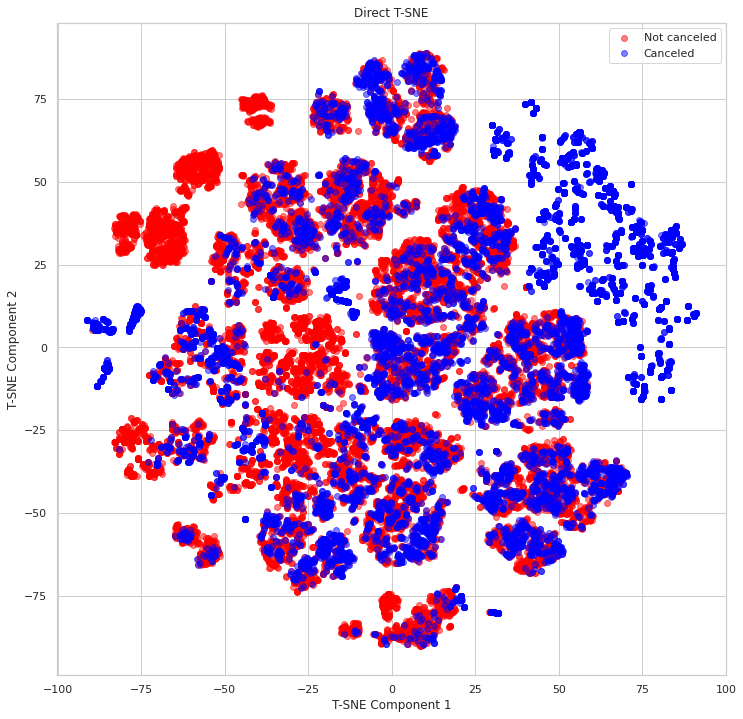

In [ ]:
plt.figure(figsize=(12,12))

plt.scatter(X_tsne[y_tsne==0, 0], X_tsne[y_tsne==0, 1], color='red', alpha=0.5,label='Not canceled')
plt.scatter(X_tsne[y_tsne==1, 0], X_tsne[y_tsne==1, 1], color='blue', alpha=0.5,label='Canceled')
plt.title("Direct T-SNE")
plt.ylabel('T-SNE Component 2')
plt.xlabel('T-SNE Component 1')
plt.legend()
plt.show()

The overlapping between the two clusters is smaller in Direct T-SNE than in PCA but still not super distinct.

#### 2.2.2 Perform T-SNE after PCA 

##### 2.2.2.1 Use Full Sample

In [ ]:
# Reset the index of X_pca_15
X_pca_15 = pd.DataFrame(X_pca_15).reset_index(drop=True)

# Initialize t-SNE with a new name
tsne_pca = TSNE(n_components=2, verbose=1, learning_rate=300,
            perplexity=50, early_exaggeration=24, init='random',
            random_state=2019, n_jobs=-1)

# Apply t-SNE to all samples in X_pca_15
X_tsne_pca = tsne_pca.fit_transform(X_pca_15)
y_tsne_pca = y

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 119390 samples in 0.652s...
[t-SNE] Computed neighbors for 119390 samples in 174.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 119390
[t-SNE] Computed conditional probabilities for sample 2000 / 119390
[t-SNE] Computed conditional probabilities for sample 3000 / 119390
[t-SNE] Computed conditional probabilities for sample 4000 / 119390
[t-SNE] Computed conditional probabilities for sample 5000 / 119390
[t-SNE] Computed conditional probabilities for sample 6000 / 119390
[t-SNE] Computed conditional probabilities for sample 7000 / 119390
[t-SNE] Computed conditional probabilities for sample 8000 / 119390
[t-SNE] Computed conditional probabilities for sample 9000 / 119390
[t-SNE] Computed conditional probabilities for sample 10000 / 119390
[t-SNE] Computed conditional probabilities for sample 11000 / 119390
[t-SNE] Computed conditional probabilities for sample 12000 / 119390
[t-SNE] Computed conditional prob

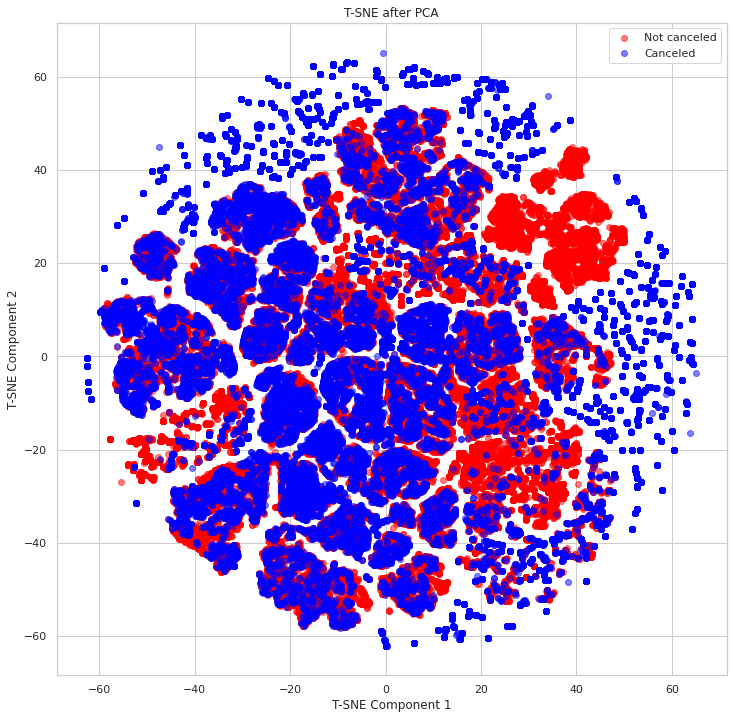

In [ ]:
# Plot the T-SNE reduced data
plt.figure(figsize=(12,12))
plt.scatter(X_tsne_pca[y_tsne_pca==0, 0], X_tsne_pca[y_tsne_pca==0, 1], color='red', alpha=0.5,label='Not canceled')
plt.scatter(X_tsne_pca[y_tsne_pca==1, 0], X_tsne_pca[y_tsne_pca==1, 1], color='blue', alpha=0.5,label='Canceled')
plt.title("T-SNE after PCA")
plt.ylabel('T-SNE Component 2')
plt.xlabel('T-SNE Component 1')
plt.legend()
plt.show()

As shown in the plot T-SNE after PCA, although the overlapping between the two clusters is smaller than in Direct T-SNE, the distinction between them is still unclear.

Then, we save the 2 components obtained from tsne_pca as a new dataset to do further clustering.

In [ ]:
# Save the 2 principal components obtained from tsne_pca as a new dataset
df_tsne_pca = pd.DataFrame(X_tsne_pca, columns=['Component 1', 'Component 2'])

##### 2.2.2.2 Use 30,000 Random Sub-sample

Firstly, we check whether the 30,000 random sub-sample can be a good representative of the whole data using clustering analysis.

In [ ]:
# Set a random seed for reproducibility
np.random.seed(200)

# Randomly select n samples from X_pca_15
n = 30000
index_sample = np.random.choice(X_pca_15.index, n, replace=False)
X_sample = X_pca_15.loc[index_sample]

# Fit KMeans on the full dataset
kmeans_full = KMeans(n_clusters=2, random_state=2019)
labels_full = kmeans_full.fit_predict(X_pca_15)

# Fit KMeans on the randomly selected samples
kmeans_sample = KMeans(n_clusters=2, random_state=2019)
labels_sample = kmeans_sample.fit_predict(X_sample)

# Check the agreement between the full dataset and the randomly selected samples
agreement = sum(labels_full[index_sample] == labels_sample) / len(labels_sample)

print('Agreement between full dataset and randomly selected samples: {:.2f}'.format(agreement))


Agreement between full dataset and randomly selected samples: 0.75


The agreement value of 0.75 suggests a relatively high level of agreement between the two sets of cluster labels, indicating that the subset of data is representative of the full dataset.

In [ ]:
# Initialize t-SNE
import time 
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, learning_rate=300,
            perplexity=50, early_exaggeration=24, init='random',
            random_state=2019, n_jobs=-1)


# Apply t-SNE to the selected samples
X_tsne_sample = tsne.fit_transform(X_sample)
y_tsne_sample = y[index_sample]

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.072s...
[t-SNE] Computed neighbors for 30000 samples in 18.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for s

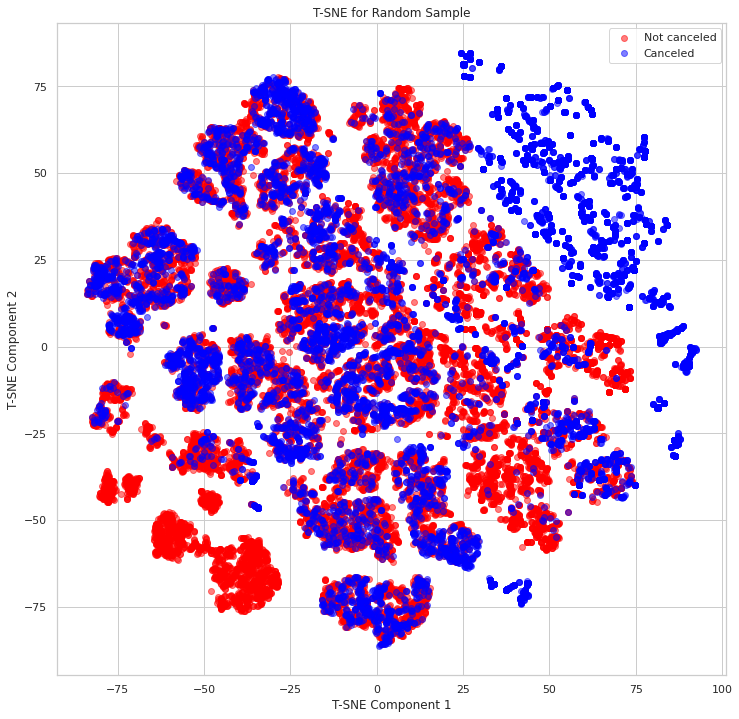

In [ ]:
plt.figure(figsize=(12,12))

plt.scatter(X_tsne_sample[y_tsne_sample==0, 0], X_tsne_sample[y_tsne_sample==0, 1], color='red', alpha=0.5,label='Not canceled')
plt.scatter(X_tsne_sample[y_tsne_sample==1, 0], X_tsne_sample[y_tsne_sample==1, 1], color='blue', alpha=0.5,label='Canceled')
plt.title("T-SNE for Random Sample")
plt.ylabel('T-SNE Component 2')
plt.xlabel('T-SNE Component 1')
plt.legend()
plt.show()

The overlap between the two clusters is smaller than in PCA, but the distinction between them is still unclear.

Then, we save the 2 components obtained from tsne_pca_sample as a new dataset to do further clustering.

In [ ]:
df_tsne_pca_sample = pd.DataFrame({'tsne_pca_1': X_tsne_sample[:, 0], 'tsne_pca_2': X_tsne_sample[:, 1]})

The unclear distinction between clusters in PCA and t-SNE suggests that more exploration is needed to determine the underlying data patterns and structure.

# 3.Data Modeling

### 3.1 Clustering

Now we have used PCA to perform an initial reduction and another dimension reduction technique, t-SNE algorithm for further dimension reduction. We will apply elbow method to the optimal k on data that was reduced by both PCA and t-sne. (We choose the whole data instead of the sample to provide a more comprehensive view of the data and identify some key patterns and trend.)

In [ ]:
full_values=df_tsne_pca[['Component 1', 'Component 2']].values

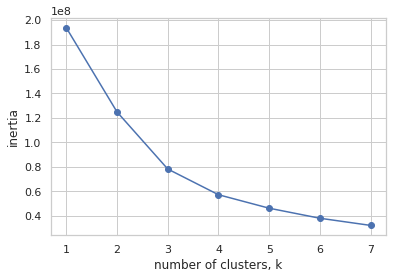

In [ ]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(full_values)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

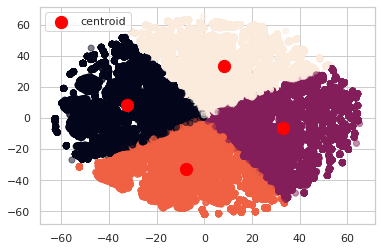

In [ ]:
model = KMeans(n_clusters=4)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(full_values)

C = model.cluster_centers_

x3 = full_values[:,0]
y3 = full_values[:,1]

plt.scatter(x3, y3, c=labels, alpha=0.5)


c_x = C[:,0]
c_y = C[:,1]

plt.scatter(c_x, c_y, s = 150, 
            c = 'red', label = 'centroid')
plt.legend()

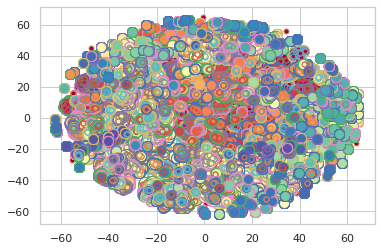

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = .5, min_samples =15).fit(full_values)
labels_3 = dbscan.labels_
core_samples = np.zeros_like(labels_3, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True

unique_labels_3 = np.unique(labels_3)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels_3)))
for (label, color) in zip(unique_labels_3, colors):
    class_member_mask = (labels_3 == label)
    xy = full_values[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = full_values[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)

By comparing K-Means and DBSCAN plots, we found that since the shape is spherical, K-means performs better for our data.

In [ ]:
cluster_data=data.copy()
cluster_data['labels']=labels
cluster_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type    agent  \
0                  C                3   No Deposit  Unknown   
1                  C                4   No Deposit  Unknown   
2                  C                0   No Deposit  Unknown   
3                  A                0   No Deposit      304   
4                  A                0   No Deposit      240   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   labels  
0       3  
1       3  
2       3  
3       3  
4       2

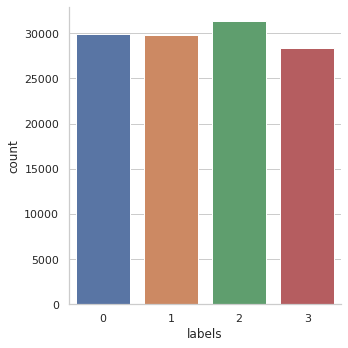

In [ ]:
sns.catplot(x='labels', kind='count', data=cluster_data)

Now we try to dig deep into these clusters in order to get more insight, finding some characteristics of each cluster. 

In [ ]:
df_cl=cluster_data.groupby(["labels"])[["is_canceled"]].sum()
df_cl

is_canceled
labels             
0             13035
1             10675
2             10945
3              9569

In [ ]:
cl_map = px.choropleth(cluster_data,
                    locations=cluster_data.country,
                    color=cluster_data["labels"], 
                    hover_name=cluster_data.country, 
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    title="Countries of clusters")
cl_map.show()

In [ ]:
cl_data=all_data.copy()
cl_data['labels']=labels
description = cl_data.groupby("labels")['hotel', 'is_repeated_guest', 'previous_cancellations', 'required_car_parking_spaces', 'is_family', 'total_customer']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

hotel  is_repeated_guest  previous_cancellations  \
labels                                                        
0       0.772007           0.001472                0.050167   
1       0.548306           0.125730                0.182757   
2       0.860847           0.000000                0.038017   
3       0.455800           0.000635                0.079821   

        required_car_parking_spaces  is_family  total_customer  n_clients  
labels                                                                     
0                          0.000033   0.264415        2.318127      29900  
1                          0.098524   0.001275        1.766790      29810  
2                          0.000000   0.000000        1.942304      31354  
3                          0.159783   0.041128        1.839617      28326

So based on the map and description chart, we can find


*   people that were labelled 0 are more likely to live in a city hotel and less likely to be a repeated guest and don't require car parking spaces.
*   people that were labelled 1 really need car parking spaces.
*   people that were labelled 2 also don't need car parking space and go with the most number of people.
*   people that were labelled 3 are most likely to be a repeated guest and have the most number of previous cancellations among groups.


### 3.2 Classification

#### 3.2.1 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
X_train, X_test, y_train, y_test = train_test_split(all_data[features], all_data['is_canceled'], train_size=2/3, random_state = 0)

#### 3.2.2 Apply Models

In [ ]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
Models = [
      DecisionTreeClassifier(random_state=0), 
      RandomForestClassifier(random_state=0), 
      GradientBoostingClassifier(random_state=0),
      XGBClassifier(random_state=0),
      LogisticRegression(random_state=0),
      SGDClassifier(random_state=0),
      KNeighborsClassifier()
      ]

In [ ]:
# Create table to compare classifier metrics
Models_columns = ['Name', 'Time', 'Train_Accuracy', 'Test_Accuracy','CV_Accuracy','Train_Precision', 'Test_Precision', 'Train_Recall', 'Test_Recall', 'Train_F1', 'Test_F1']
Models_compare = pd.DataFrame(columns = Models_columns)

In [ ]:
# Choose scoring metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import time

# index through classifier and save performance to table
row_index = 0
for alg in Models:

    # Set name and parameters
    Models_name = alg.__class__.__name__
    Models_compare.loc[row_index, 'Name'] = Models_name

    # Measure the fit time for the model
    start_time = time.time()
    alg.fit(X_train, y_train)
    fit_time = time.time() - start_time
    Models_compare.loc[row_index, 'Time'] = fit_time
    
    # Make predictions on the training and test data
    y_train_pred = alg.predict(X_train)
    y_test_pred = alg.predict(X_test)
    
# Calculate accuracy, precision, recall, and F1-score for the training and test predictions
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    Models_compare.loc[row_index, 'Train_Accuracy'] = train_accuracy
    Models_compare.loc[row_index, 'Test_Accuracy'] = test_accuracy
    Models_compare.loc[row_index, 'Train_Precision'] = train_precision
    Models_compare.loc[row_index, 'Test_Precision'] = test_precision
    Models_compare.loc[row_index, 'Train_Recall'] = train_recall
    Models_compare.loc[row_index, 'Test_Recall'] = test_recall
    Models_compare.loc[row_index, 'Train_F1'] = train_f1
    Models_compare.loc[row_index, 'Test_F1'] = test_f1

    # Calculate cross-validated training accuracy
    cv_accuracy = cross_val_score(alg, X_train, y_train, cv=4, scoring='accuracy', n_jobs=-1).mean()
    Models_compare.loc[row_index, 'CV_Accuracy'] = cv_accuracy
    
    row_index += 1

#### 3.2.3 Model Assessment

In [ ]:
Models_compare.sort_values(by = ['Test_Accuracy'], ascending = False, inplace = True)
Models_compare

Name       Time Train_Accuracy Test_Accuracy  \
1      RandomForestClassifier  12.807145       0.995452      0.879614   
3               XGBClassifier  11.413221       0.884487       0.86112   
0      DecisionTreeClassifier   0.757541       0.995464       0.83652   
2  GradientBoostingClassifier  14.539113       0.833101      0.832977   
6        KNeighborsClassifier   0.015096       0.881246      0.822047   
4          LogisticRegression   1.177807       0.777895      0.778601   
5               SGDClassifier  10.987435       0.762479      0.760736   

  CV_Accuracy Train_Precision Test_Precision Train_Recall Test_Recall  \
1    0.874587        0.996509       0.868902     0.991149    0.797683   
3    0.859385        0.872472       0.843062     0.804636     0.77135   
0    0.828188        0.997701       0.777733     0.989992    0.786638   
2    0.830412        0.824305       0.825462     0.696181    0.700431   
6    0.820072        0.860237       0.779554     0.809811    0.729256   
4    0.783813         0.77871        0.78234     0.556304    0.563308   
5    0.761097         0.67879       0.680078     0.676641     0.67733   

   Train_F1   Test_F1  
1  0.993822  0.831771  
3  0.837182  0.805613  
0  0.993832   0.78216  
2  0.754844  0.757824  
6  0.834263  0.753567  
4  0.648981  0.654998  
5  0.677714  0.678702

Although Random Forest has the highest test accuracy, the cross validation train accuracy (0.87) is much lower than train accuracy 0.99, so this model is probably overfitting. XGBoost and GradientBoosting have similar test accuracy without overfit problem. But XGBoost has a lower time cost for training the model. Thus, XGboost will be our final model.

#### 3.2.4 Choose Model: XGBoost

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 10, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGBoost Classifier is : 0.8702917305324522
Confusion Matrix : 
[[22930  2019]
 [ 3143 11705]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     24949
           1       0.85      0.79      0.82     14848

    accuracy                           0.87     39797
   macro avg       0.87      0.85      0.86     39797
weighted avg       0.87      0.87      0.87     39797



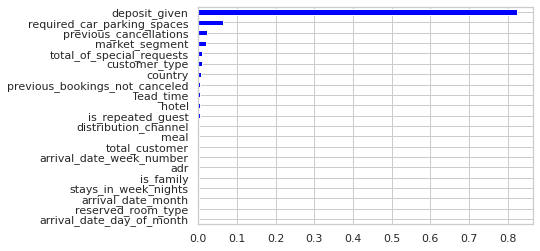

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_xgb = pd.Series(xgb.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_xgb = importances_xgb.sort_values()
# Make a horizontal bar plot
sorted_importances_xgb.plot(kind='barh', color='blue')
plt.show()

Text(0.5, 257.44, 'Predicted label')

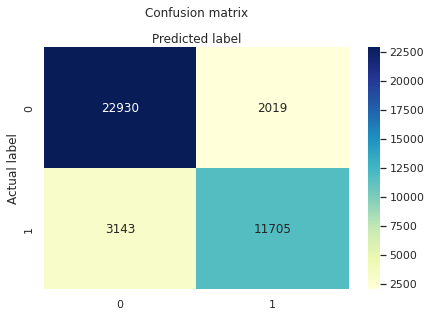

In [ ]:
# Plot Confusion Matrix:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
cnf_matrix

class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

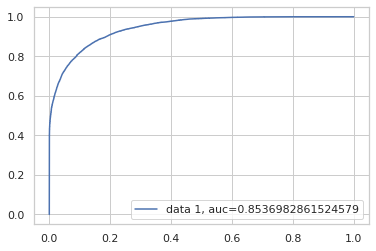

AUC Score: 0.8536982861524579


In [ ]:
# ROC Curve:
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print('AUC Score:', auc)

### Remove Suspscious Column Deposit Given

Since the cancelation rate for refundable is significantly lower than non-refundable, the column deposit_given is counter-intuitive. Thus we decide to drop this column and rerun the model to see what are some other important features.

In [ ]:
features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'customer_type',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'deposit_given']

In [ ]:
features2 = features
features2.remove('deposit_given')

In [ ]:
features2

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'customer_type',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
X_train, X_test, y_train, y_test = train_test_split(all_data[features2], all_data['is_canceled'], train_size=2/3, random_state = 0)

In [ ]:
# Choose scoring metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import time

# index through classifier and save performance to table
row_index = 0
for alg in Models:

    # Set name and parameters
    Models_name = alg.__class__.__name__
    Models_compare.loc[row_index, 'Name'] = Models_name

    # Measure the fit time for the model
    start_time = time.time()
    alg.fit(X_train, y_train)
    fit_time = time.time() - start_time
    Models_compare.loc[row_index, 'Time'] = fit_time
    
    # Make predictions on the training and test data
    y_train_pred = alg.predict(X_train)
    y_test_pred = alg.predict(X_test)
    
# Calculate accuracy, precision, recall, and F1-score for the training and test predictions
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    Models_compare.loc[row_index, 'Train_Accuracy'] = train_accuracy
    Models_compare.loc[row_index, 'Test_Accuracy'] = test_accuracy
    Models_compare.loc[row_index, 'Train_Precision'] = train_precision
    Models_compare.loc[row_index, 'Test_Precision'] = test_precision
    Models_compare.loc[row_index, 'Train_Recall'] = train_recall
    Models_compare.loc[row_index, 'Test_Recall'] = test_recall
    Models_compare.loc[row_index, 'Train_F1'] = train_f1
    Models_compare.loc[row_index, 'Test_F1'] = test_f1

    # Calculate cross-validated training accuracy
    cv_accuracy = cross_val_score(alg, X_train, y_train, cv=4, scoring='accuracy', n_jobs=-1).mean()
    Models_compare.loc[row_index, 'CV_Accuracy'] = cv_accuracy
    
    row_index += 1

In [ ]:
Models_compare.sort_values(by = ['Test_Accuracy'], ascending = False, inplace = True)
Models_compare

Name       Time Train_Accuracy Test_Accuracy  \
1      RandomForestClassifier  13.175948       0.995464      0.879941   
3               XGBClassifier  12.114469       0.882213      0.858658   
0      DecisionTreeClassifier    0.64235       0.995464      0.834711   
2  GradientBoostingClassifier  14.041746       0.829495      0.827198   
6        KNeighborsClassifier   0.014505       0.880919      0.822147   
4          LogisticRegression   1.014494       0.765746      0.764756   
5               SGDClassifier  16.253481       0.745706      0.741187   

  CV_Accuracy Train_Precision Test_Precision Train_Recall Test_Recall  \
1     0.87475        0.996373       0.868217     0.991319    0.799569   
3    0.858078        0.867409       0.835357     0.803717     0.77364   
0     0.82849        0.997633       0.772865      0.99006    0.788793   
2    0.827523        0.795211       0.794285     0.724639    0.724475   
6    0.819846        0.858497       0.778535     0.811036    0.731344   
4    0.769465        0.713145       0.713563     0.611111    0.617255   
5    0.746661        0.746919       0.746104     0.470384    0.464305   

   Train_F1   Test_F1  
1   0.99384   0.83248  
3  0.834349  0.803315  
0  0.993832  0.780748  
2  0.758287  0.757775  
6  0.834092  0.754202  
4  0.658197  0.661924  
5  0.577241  0.572401

### Feature Importance

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 10, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGBoost Classifier is : 0.8697640525667764
Confusion Matrix : 
[[22902  2047]
 [ 3136 11712]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     24949
           1       0.85      0.79      0.82     14848

    accuracy                           0.87     39797
   macro avg       0.87      0.85      0.86     39797
weighted avg       0.87      0.87      0.87     39797



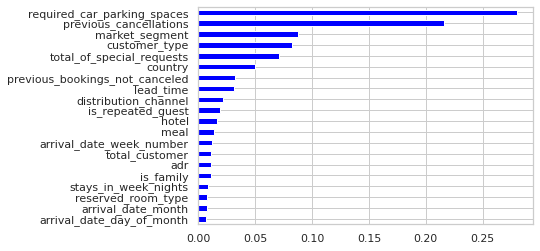

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_xgb = pd.Series(xgb.feature_importances_,
index = features2)
# Sort importances_rf
sorted_importances_xgb = importances_xgb.sort_values()
# Make a horizontal bar plot
sorted_importances_xgb.plot(kind='barh', color='blue')
plt.show()

The important features we find are required parking spaces, previous cancelations, and market segments. We can offer some business strategies based on the findings, such as providing clear and accurate information about parking,encouraging direct booking, etc.